In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-dataset/heart_attack_dataset.csv


Import the file

In [5]:
data ="/kaggle/input/heart-attack-dataset/heart_attack_dataset.csv"
df=pd.read_csv(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 1000 non-null   object
 1   Age                    1000 non-null   int64 
 2   Blood Pressure (mmHg)  1000 non-null   int64 
 3   Cholesterol (mg/dL)    1000 non-null   int64 
 4   Has Diabetes           1000 non-null   object
 5   Smoking Status         1000 non-null   object
 6   Chest Pain Type        1000 non-null   object
 7   Treatment              1000 non-null   object
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


select the target feature and the predictors and convert the predictors to discrete dtypes

In [6]:
X = df.copy()
y=X.pop('Chest Pain Type')

for colname in X.select_dtypes("object"):
    X[colname],_=X[colname].factorize()
    
discrete_features = X.dtypes == int


use library sci-kit feature_selection module on the real valued targets; mutual_info_regression and categorical targets;mutual_info_classif

In [7]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X,y,discrete_features):
    mi_scores=mutual_info_classif(X,y,discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores,name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
mi_scores = make_mi_scores(X,y,discrete_features)
mi_scores

Cholesterol (mg/dL)      0.267500
Blood Pressure (mmHg)    0.195973
Age                      0.104874
Treatment                0.005011
Smoking Status           0.001363
Has Diabetes             0.000575
Gender                   0.000560
Name: MI Scores, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


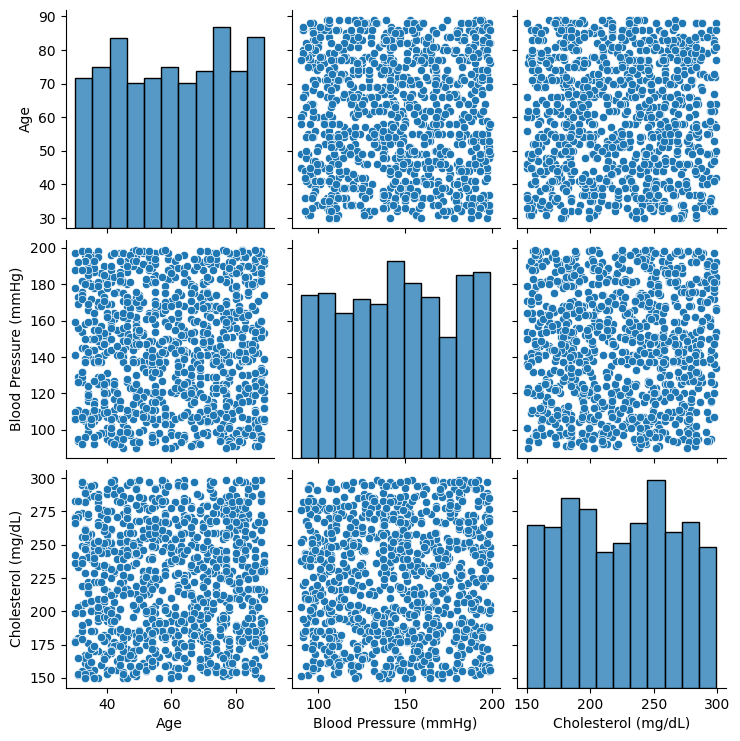

In [46]:
import seaborn as sns
hue=['Treatment','Smoking Status','Has Diabetes','Gender']
y=["Blood Pressure (mmHg)","Cholesterol (mg/dL)"]
sns.pairplot(data=df)


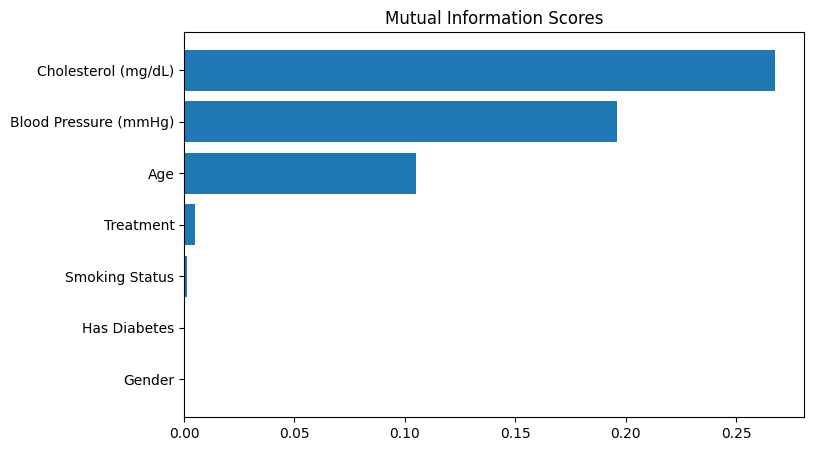

In [8]:
import matplotlib.pyplot as plt
def plot_mi_scores(scores):
    scores=scores.sort_values(ascending = True)
    width = np.arange(len(scores))
    ticks=list(scores.index)
    plt.barh(width,scores)
    plt.yticks(width,ticks)
    plt.title("Mutual Information Scores")
plt.figure(dpi=100,figsize=(8,5))
plot_mi_scores(mi_scores)

In [61]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=6,n_init=5,max_iter=2)
X["Clusters"]=kmeans.fit_predict(X)
X["Clusters"]=X["Clusters"].astype("category")
X.head()

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Treatment,Clusters
0,0,70,181,262,0,0,0,1
1,1,55,103,253,1,0,1,0
2,0,42,95,295,1,1,1,3
3,0,84,106,270,0,0,2,3
4,0,86,187,296,1,1,3,1


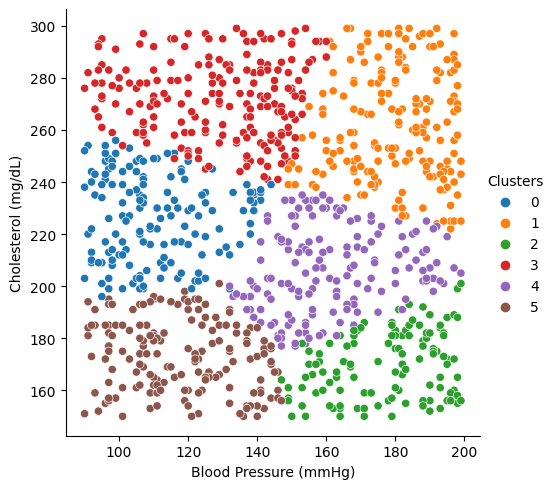

In [62]:
sns.relplot(x="Blood Pressure (mmHg)",y="Cholesterol (mg/dL)",data=X,hue="Clusters")

In [ ]:
X["Chest Type Pain"]=df["Chest Pain Type"]
for colname in X.select_dtypes("object"):
    X[colname],_=X[colname].factorize()
sns.catplot(x='Chest Pain Type',y="Age",data=df,kind="boxen",hue="Gender",col="Smoking Status",row="Has Diabetes",height=6)